In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('D3.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142219 entries, 0 to 142218
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Year           142219 non-null  int64  
 1   Month          142219 non-null  int64  
 2   Location       142219 non-null  object 
 3   MinTemp        142219 non-null  float64
 4   MaxTemp        142219 non-null  float64
 5   Rainfall       142219 non-null  float64
 6   Evaporation    142219 non-null  float64
 7   Sunshine       142219 non-null  float64
 8   WindGustDir    142219 non-null  object 
 9   WindGustSpeed  142219 non-null  int64  
 10  WindDir9am     142219 non-null  object 
 11  WindDir3pm     142219 non-null  object 
 12  WindSpeed9am   142219 non-null  int64  
 13  WindSpeed3pm   142219 non-null  int64  
 14  Humidity9am    142219 non-null  float64
 15  Humidity3pm    142219 non-null  float64
 16  Pressure9am    142219 non-null  float64
 17  Pressure3pm    142219 non-nul

In [2]:
# Some general thoughts and takeaways from the data processing in the Assignment 1 regarding the input variables
# 1. Year will not be used as this input is unique and is not informative (like ID)
# 2. Month will be used as rainy days usually happen in several months on a yearly basis.
# 3. MinTemp and MaxTemp are highly correlated (R=0.74), and these two variables will be combined to a new variable "Temp".
# 4. Rainfall, Evaporation, and Sunshine are skewed. DT is not sensitive to the scale of variables so they will remain unchanged.
# 5. Wind info (dir or speed) will be used.
# 6. Humidity info will be used. 
# 7. Pressure9am and Pressure3pm are highly correlated and will be combine to a new variable "Pressure".
# 8. Cloud9am and Cloud3pm are removed due to their high correlation with Sunshine.
# 9. Temp9am and Temp3pm are removed due to their high correlation with MinTemp.

# In summary, "Year, Cloud9am, Cloud3pm, Temp9am and Temp3pm" are removed. "MinTemp and MaxTemp" => "Temp". "Pressure9am and Pressure3pm" => "Pressure". 
# It is expected to have 15 input variables after processing. 

In [3]:
# This block of code will do the processing as mentioned above. The processed data may need further processing for LR and NN. 

# Drop columns that should be removed due to high correlation with other variables
columns_to_drop = ['Year', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
df2 = df.drop(columns=columns_to_drop)

# Create new averaged variables "Temp" and "Pressure" and then drop 4 columns used for creating these variables
df2['Pressure'] = (df2['Pressure9am'] + df2['Pressure3pm'])/2
df2['Temp'] = (df2['MinTemp'] + df2['MaxTemp'])/2
columns_to_drop2 = ['Pressure9am', 'Pressure3pm', 'MinTemp', 'MaxTemp']
df2 = df2.drop(columns=columns_to_drop2)

# Use one-hot encoding for categorical variables
df2 = pd.get_dummies(df2)
print(df2.info())

# Target/input split
y = df2['RainTomorrow']
X = df2.drop(['RainTomorrow'], axis=1)

# Split the data into training and testing data
from sklearn.model_selection import train_test_split

rs = 10
X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142219 entries, 0 to 142218
Columns: 109 entries, Month to WindDir3pm_WSW
dtypes: bool(97), float64(7), int64(5)
memory usage: 26.2 MB
None


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [6]:
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 1.0


In [7]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.7896920264379131


In [8]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     33101
           1       0.53      0.54      0.54      9565

    accuracy                           0.79     42666
   macro avg       0.70      0.70      0.70     42666
weighted avg       0.79      0.79      0.79     42666



In [9]:
# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

Humidity3pm : 0.26132657865677433
Pressure : 0.07591182617007108
Temp : 0.06895866715286508
Rainfall : 0.06330962076075361
WindGustSpeed : 0.06304829749754523
Sunshine : 0.051526894430997824
Humidity9am : 0.04959451140877614
WindSpeed3pm : 0.03694270033351973
WindSpeed9am : 0.036262430454805684
Evaporation : 0.031926694146998016
Month : 0.026509314717523807
WindDir9am_N : 0.004892770067147711
WindDir3pm_N : 0.004719413877613991
WindDir3pm_NNW : 0.004409830463576683
WindDir3pm_NW : 0.004332151838350789
WindGustDir_NE : 0.0040641614203426185
WindGustDir_N : 0.003943209675050949
WindGustDir_SW : 0.003865272899875789
WindGustDir_S : 0.003855641382263514
WindDir9am_NW : 0.0037752246636565054


In [10]:
# import pydot
# from io import StringIO
# from sklearn.tree import export_graphviz

# # visualize
# dotfile = StringIO()
# export_graphviz(model, out_file=dotfile, feature_names=X.columns)
# graph = pydot.graph_from_dot_data(dotfile.getvalue())
# graph.write_png("dt_visualization.png") # saved in the following file - will return True if successful

In [11]:
print(model.tree_.feature[0])

8


In [12]:
print(feature_names[8])

Humidity3pm


In [13]:
num_nodes = model.tree_.node_count
num_leaves = model.get_n_leaves()

print(num_nodes, num_leaves)

24485 12243


In [14]:
from sklearn.model_selection import GridSearchCV

# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(1, 16),
          'min_samples_leaf': range(0, 25, 5)[1:]}

cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs),return_train_score=True, cv=10)
cv_1.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 16),
                         'min_samples_leaf': range(5, 25, 5)},
             return_train_score=True)

In [15]:
print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 5}


In [16]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.8488342892730505
Test accuracy: 0.8411850185159143


In [18]:
num_nodes = cv_1.best_estimator_.tree_.node_count
num_leaves = cv_1.best_estimator_.get_n_leaves()

print(num_nodes, num_leaves)

475 238


In [19]:
print(cv_1.best_estimator_.tree_.feature[0])

8


In [20]:
print(feature_names[8])

Humidity3pm


In [21]:
### Enter your code here
importances = cv_1.best_estimator_.feature_importances_
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

Humidity3pm : 0.6210886371783307
Rainfall : 0.1013670287873209
WindGustSpeed : 0.07786988178691295
Pressure : 0.06931905985641469
Sunshine : 0.06489778479388851
Temp : 0.017297934703712024
Humidity9am : 0.010426928406427534
WindSpeed3pm : 0.005571413233730641
Location_MountGinini : 0.0036902773321136743
WindSpeed9am : 0.002731845904030169
Evaporation : 0.0024920007843218643
WindDir3pm_NNW : 0.002172839329360932
Location_Albany : 0.002149410626922742
Location_Wollongong : 0.0020068298629072273
WindDir3pm_N : 0.0016369502393569556
WindGustDir_NE : 0.0015878863415322696
Location_Brisbane : 0.0015085686366425846
WindDir9am_NNE : 0.001215868033739137
Location_NorahHead : 0.0011290139783953137
Location_Dartmoor : 0.0010830494231520303


In [ ]:
# Overfitting during the cross validation process

In [22]:
y_pred_dt = model.predict(X_test)
y_pred_dt_cv = cv_1.best_estimator_.predict(X_test)

print("Accuracy score on test for DT_default:", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for DT_optimal", accuracy_score(y_test, y_pred_dt_cv))

Accuracy score on test for DT_default: 0.7896920264379131
Accuracy score on test for DT_optimal 0.8411850185159143


In [23]:
from sklearn.metrics import roc_auc_score
y_pred_proba_dt = model.predict_proba(X_test)
y_pred_proba_dt_cv = cv_1.best_estimator_.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_default:", roc_index_dt)
print("ROC index on test for DT_optimal:", roc_index_dt_cv)

ROC index on test for DT_default: 0.7014758391340492
ROC index on test for DT_optimal: 0.8497667982639836


In [24]:
from sklearn.metrics import roc_curve

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

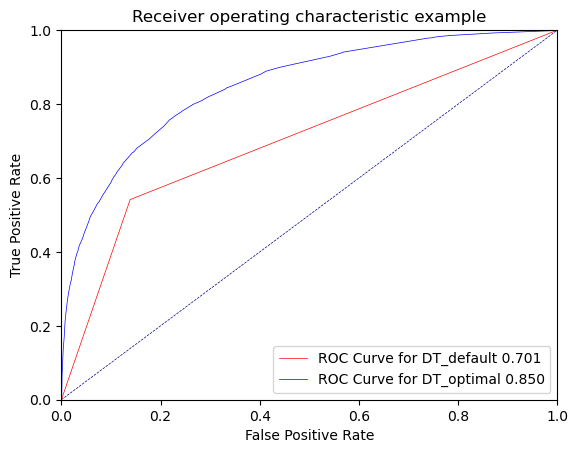

In [25]:
import matplotlib.pyplot as plt

plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [26]:
import pickle
dt_best = cv_1
with open('Assign2_DT.pickle', 'wb') as f:
    pickle.dump([dt_best,roc_index_dt_cv, fpr_dt_cv, tpr_dt_cv], f)

Total number of models:  120


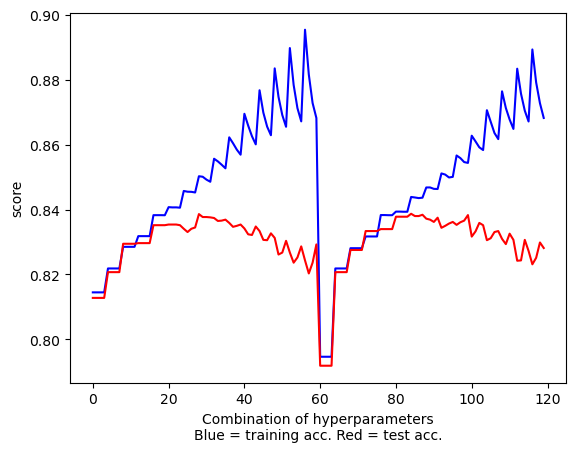

In [14]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot max depth hyperparameter values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Combination of hyperparameters\nBlue = training acc. Red = test acc.')
plt.ylabel('score')
plt.show()